In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf

from tensorflow.keras.models import Sequential      # class
from tensorflow.keras.models import load_model      # model 사용
from tensorflow.keras.layers import Flatten           # 전결합
from tensorflow.keras.layers import Dense           # 전결합
from tensorflow.keras.layers import Dropout         # 노드의 비활성화
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras import regularizers   # L1, L2 규제 적용

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold  # K 겹 교차 검증
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from tensorflow.keras.datasets import mnist           # 전결합

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


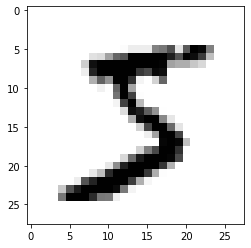

In [18]:
plt.imshow(x_train[0], cmap=plt.get_cmap('binary'))
print(y_train[0])

0


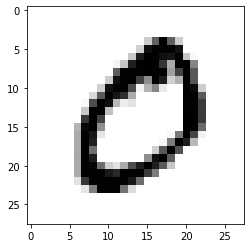

In [19]:
plt.imshow(x_train[1], cmap=plt.get_cmap('binary'))
print(y_train[1])

In [20]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
x_train, x_test = x_train / 255.0, x_test  / 255.0

In [103]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es= EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [104]:
hist = model.fit(x_train, y_train, validation_split = 0.2, shuffle=True,
                     epochs=100, batch_size=500, callbacks=[es])

Epoch 1/100
96/96 [==============================] - 1s 11ms/step - loss: 1.4727 - accuracy: 0.4992 - val_loss: 0.2688 - val_accuracy: 0.9215
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3981 - accuracy: 0.8864 - val_loss: 0.1819 - val_accuracy: 0.9454
Epoch 3/100
96/96 [==============================] - 1s 8ms/step - loss: 0.2917 - accuracy: 0.9165 - val_loss: 0.1486 - val_accuracy: 0.9572
Epoch 4/100
96/96 [==============================] - 1s 8ms/step - loss: 0.2468 - accuracy: 0.9303 - val_loss: 0.1335 - val_accuracy: 0.9611
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 0.2124 - accuracy: 0.9391 - val_loss: 0.1201 - val_accuracy: 0.9652
Epoch 6/100
96/96 [==============================] - 1s 9ms/step - loss: 0.1887 - accuracy: 0.9448 - val_loss: 0.1152 - val_accuracy: 0.9685
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.1739 - accuracy: 0.9501 - val_loss: 0.1082 - val_accuracy: 0.9700
Epoch 8/100


In [49]:
model.predict(x_test[0:10])

array([[4.57046849e-14, 2.57189992e-15, 5.31500677e-11, 5.39401022e-08,
        2.80999030e-21, 2.88750516e-14, 1.26192239e-21, 1.00000000e+00,
        6.90105084e-10, 9.71118652e-09],
       [2.48557329e-15, 1.87358007e-12, 1.00000000e+00, 2.31800375e-14,
        2.86560041e-27, 4.66062812e-15, 2.35936093e-15, 5.39830893e-28,
        1.23137492e-12, 4.33237122e-28],
       [4.27798241e-09, 9.99998689e-01, 3.25676865e-07, 2.76855778e-11,
        2.38670879e-08, 3.76449893e-09, 1.72776238e-09, 5.07079619e-07,
        4.44012926e-07, 1.33009892e-09],
       [1.00000000e+00, 9.62746209e-19, 1.01050814e-13, 1.69463458e-20,
        3.18737923e-22, 4.87378901e-19, 1.60722618e-12, 7.60415765e-13,
        3.84210160e-23, 1.12999985e-18],
       [8.38236511e-12, 2.57197468e-17, 5.34595751e-13, 1.85380340e-17,
        9.99999523e-01, 6.95227275e-20, 2.56471623e-12, 1.01898512e-09,
        5.58019689e-12, 5.22749588e-07],
       [1.53623416e-11, 9.99987960e-01, 3.78633860e-11, 1.08793660e-12,
   

In [115]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9782


[0.08464914560317993, 0.9782000184059143]

In [51]:
import PIL.Image as pilimg

In [134]:
img = []
im = pilimg.open("0.bmp")
img.append(np.array(im))
im = pilimg.open("1.bmp")
img.append(np.array(im))

im = pilimg.open("2.bmp")
img.append(np.array(im))
im = pilimg.open("3.bmp")
img.append(np.array(im))

im = pilimg.open("4.bmp")
img.append(np.array(im))
im = pilimg.open("5.bmp")
img.append(np.array(im))

im = pilimg.open("6.bmp")
img.append(np.array(im))
im = pilimg.open("7.bmp")
img.append(np.array(im))

im = pilimg.open("8.bmp")
img.append(np.array(im))
im = pilimg.open("9.bmp")
img.append(np.array(im))

im = pilimg.open("10.bmp")
img.append(np.array(im))
print(np.array(img).shape)

im.close()


(11, 28, 28)


In [135]:
print(np.where(model.predict(np.array(img)) == 1.0))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([0, 6, 0, 6, 7, 4, 7, 5, 2, 6, 3], dtype=int64))
